In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fairlearn.datasets import fetch_adult


sex
Male      32650
Female    16192
Name: count, dtype: int64

In [39]:
data = fetch_adult(as_frame=True)
data

{'data':         age     workclass    fnlwgt     education  education-num  \
 0      25.0       Private  226802.0          11th            7.0   
 1      38.0       Private   89814.0       HS-grad            9.0   
 2      28.0     Local-gov  336951.0    Assoc-acdm           12.0   
 3      44.0       Private  160323.0  Some-college           10.0   
 4      18.0           NaN  103497.0  Some-college           10.0   
 ...     ...           ...       ...           ...            ...   
 48837  27.0       Private  257302.0    Assoc-acdm           12.0   
 48838  40.0       Private  154374.0       HS-grad            9.0   
 48839  58.0       Private  151910.0       HS-grad            9.0   
 48840  22.0       Private  201490.0       HS-grad            9.0   
 48841  52.0  Self-emp-inc  287927.0       HS-grad            9.0   
 
            marital-status         occupation relationship   race     sex  \
 0           Never-married  Machine-op-inspct    Own-child  Black    Male   
 1      

In [42]:
X = pd.get_dummies(data.data)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3972180909.py, line 2)

In [ ]:
y_true = (data.target == '>50K') * 1


In [ ]:
sex = data.data['sex']


In [ ]:
sex.value_counts()

In [38]:
X

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25.0,226802.0,7.0,0.0,0.0,40.0,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,38.0,89814.0,9.0,0.0,0.0,50.0,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2,28.0,336951.0,12.0,0.0,0.0,40.0,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
3,44.0,160323.0,10.0,7688.0,0.0,40.0,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
4,18.0,103497.0,10.0,0.0,0.0,30.0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27.0,257302.0,12.0,0.0,0.0,38.0,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
48838,40.0,154374.0,9.0,0.0,0.0,40.0,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
48839,58.0,151910.0,9.0,0.0,0.0,40.0,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
48840,22.0,201490.0,9.0,0.0,0.0,20.0,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False


In [18]:
from fairlearn.metrics import MetricFrame
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(min_samples_leaf=10, max_depth=4)
classifier.fit(X, y_true)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=10)

In [19]:
y_pred = classifier.predict(X)
mf = MetricFrame(metrics=accuracy_score, y_true=y_true, y_pred=y_pred, sensitive_features=sex)
mf.overall

0.8443552680070431

In [20]:
mf.by_group

sex
Female    0.925148
Male      0.804288
Name: accuracy_score, dtype: float64

In [21]:
from fairlearn.metrics import selection_rate
sr = MetricFrame(metrics=selection_rate, y_true=y_true, y_pred=y_pred, sensitive_features=sex)
sr.overall

0.16385487899758405

In [6]:
sr.by_group

sex
Female    0.063550
Male      0.213599
Name: selection_rate, dtype: float64

In [25]:
from fairlearn.metrics import (
    MetricFrame,
    false_positive_rate,
    true_positive_rate,
    selection_rate,
    count
)
sr = MetricFrame(metrics=precision_score, y_true=y_true, y_pred=y_pred, sensitive_features=sex)
print(sr.overall)
print(sr.by_group)

0.7552167937023616
sex
Female    0.770651
Male      0.752939
Name: precision_score, dtype: float64


In [26]:
sr = MetricFrame(metrics=false_positive_rate, y_true=y_true, y_pred=y_pred, sensitive_features=sex)
print(sr.overall)
print(sr.by_group)

0.05272507064997981
sex
Female    0.016363
Male      0.075796
Name: false_positive_rate, dtype: float64


In [27]:
sr = MetricFrame(metrics=true_positive_rate, y_true=y_true, y_pred=y_pred, sensitive_features=sex)
print(sr.overall)
print(sr.by_group)

0.5171558141524771
sex
Female    0.448276
Male      0.529441
Name: true_positive_rate, dtype: float64


array([[<Axes: title={'center': 'accuracy'}, xlabel='sex'>,
        <Axes: title={'center': 'precision'}, xlabel='sex'>,
        <Axes: title={'center': 'false positive rate'}, xlabel='sex'>],
       [<Axes: title={'center': 'true positive rate'}, xlabel='sex'>,
        <Axes: title={'center': 'selection rate'}, xlabel='sex'>,
        <Axes: title={'center': 'count'}, xlabel='sex'>],
       [<Axes: xlabel='sex'>, <Axes: xlabel='sex'>, <Axes: xlabel='sex'>]],
      dtype=object)

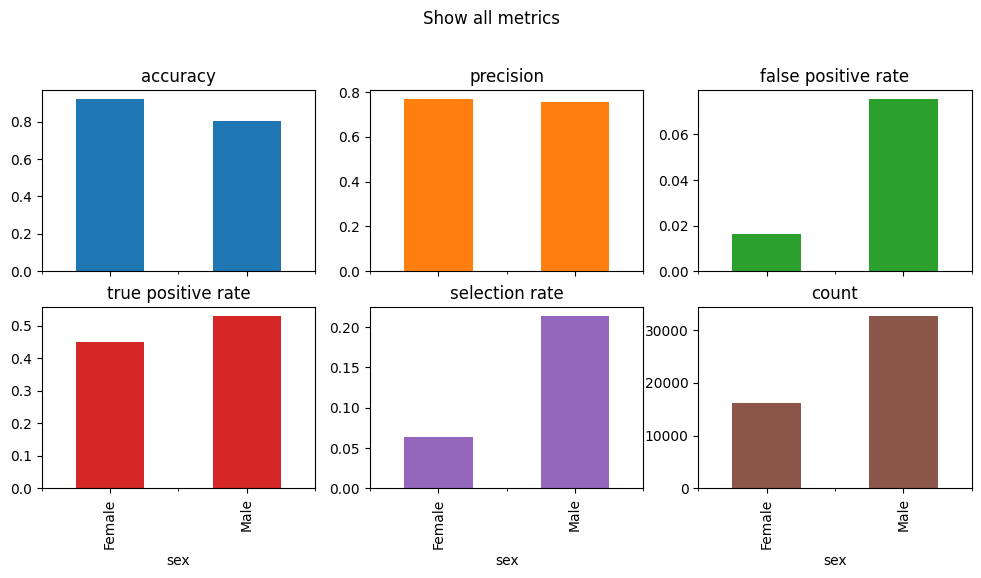

In [28]:
metrics = {
    "accuracy": accuracy_score,
    'precision': precision_score,
    'false positive rate': false_positive_rate,
    'true positive rate': true_positive_rate,    
    "selection rate": selection_rate,
    'count': count    
}
metric_frame = MetricFrame(
    metrics=metrics, y_true=y_true, y_pred=y_pred, sensitive_features=sex
)
metric_frame.by_group.plot.bar(
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12, 8],
    title="Show all metrics",
)

#Mitigating disparity

In [13]:
from fairlearn.reductions import DemographicParity, ExponentiatedGradient
np.random.seed(0)  # set seed for consistent results with ExponentiatedGradient

In [14]:
constraint = DemographicParity()
classifier = DecisionTreeClassifier(min_samples_leaf=10, max_depth=4)
mitigator = ExponentiatedGradient(classifier, constraint)
mitigator.fit(X, y_true, sensitive_features=sex)

ExponentiatedGradient(constraints=<fairlearn.reductions._moments.utility_parity.DemographicParity object at 0x000001A4387AEC50>,
                      estimator=DecisionTreeClassifier(max_depth=4,
                                                       min_samples_leaf=10),
                      nu=0.0008201769357601916)

In [15]:
y_pred_mitigated = mitigator.predict(X)

In [16]:
sr_mitigated = MetricFrame(metrics=selection_rate, y_true=y_true, y_pred=y_pred_mitigated, sensitive_features=sex)
sr_mitigated.overall

0.16614798738790384

In [17]:
sr_mitigated.by_group

sex
Female    0.155262
Male      0.171547
Name: selection_rate, dtype: float64

#1 Metrics with Multiple Features

In [43]:
import functools

import numpy as np
import sklearn.metrics as skm
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from fairlearn.datasets import fetch_adult
from fairlearn.metrics import MetricFrame, count, selection_rate

In [44]:
data = fetch_adult()
X_raw = data.data
y = (data.target == ">50K") * 1

In [49]:
X_raw

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25.0,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States
1,38.0,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States
2,28.0,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States
3,44.0,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States
4,18.0,NaN,103497.0,Some-college,10.0,Never-married,NaN,Own-child,White,Female,0.0,0.0,30.0,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27.0,Private,257302.0,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38.0,United-States
48838,40.0,Private,154374.0,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States
48839,58.0,Private,151910.0,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States
48840,22.0,Private,201490.0,HS-grad,9.0,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,20.0,United-States


In [47]:
y

0        0
1        0
2        1
3        1
4        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: class, Length: 48842, dtype: int32

In [45]:
def race_transform(input_str):
    """Reduce values to White, Black and Other."""
    result = "Other"
    if input_str == "White" or input_str == "Black":
        result = input_str
    return result


X_raw["race"] = X_raw["race"].map(race_transform).fillna("Other").astype("category")
print(np.unique(X_raw["race"]))

['Black' 'Other' 'White']


C:\Users\Jay\AppData\Local\Temp\ipykernel_31600\1847876707.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_raw["race"] = X_raw["race"].map(race_transform).fillna("Other").astype("category")


In [50]:
def marriage_transform(m_s_string):
    """Perform some simple manipulations."""
    result = "Low"
    if m_s_string.startswith("Married"):
        result = "Medium"
    elif m_s_string.startswith("Widowed"):
        result = "High"
    return result


def occupation_transform(occ_string):
    """Perform some simple manipulations."""
    result = "Small"
    if occ_string.startswith("Machine"):
        result = "Large"
    return result


col_credit = X_raw["marital-status"].map(marriage_transform).fillna("Low")
col_credit.name = "Credit Score"
col_loan_size = X_raw["occupation"].map(occupation_transform).fillna("Small")
col_loan_size.name = "Loan Size"

A = X_raw[["race", "sex"]]
A["Credit Score"] = col_credit
A["Loan Size"] = col_loan_size
A

C:\Users\Jay\AppData\Local\Temp\ipykernel_31600\4184408968.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  A["Credit Score"] = col_credit
C:\Users\Jay\AppData\Local\Temp\ipykernel_31600\4184408968.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  A["Loan Size"] = col_loan_size


,race,sex,Credit Score,Loan Size
0,Black,Male,Low,Large
1,White,Male,Medium,Small
2,White,Male,Medium,Small
3,Black,Male,Medium,Large
4,White,Female,Low,Small
...,...,...,...,...
48837,White,Female,Medium,Small
48838,White,Male,Medium,Large
48839,White,Female,High,Small
48840,White,Male,Low,Small


In [53]:
(X_train, X_test, y_train, y_test, A_train, A_test) = train_test_split(
    X_raw, y, A, test_size=0.3, random_state=54321, stratify=y
)

# Ensure indices are aligned between X, y and A,
# after all the slicing and splitting of DataFrames
# and Series

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
A_train = A_train.reset_index(drop=True)
A_test = A_test.reset_index(drop=True)

In [54]:
numeric_transformer = Pipeline(
    steps=[("impute", SimpleImputer()), ("scaler", StandardScaler())]
)
categorical_transformer = Pipeline(
    [
        ("impute", SimpleImputer(strategy="most_frequent")),
        ("ohe", OneHotEncoder(handle_unknown="ignore")),
    ]
)
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, selector(dtype_exclude="category")),
        ("cat", categorical_transformer, selector(dtype_include="category")),
    ]
)

In [55]:
unmitigated_predictor = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", LogisticRegression(solver="liblinear", fit_intercept=True)),
    ]
)

In [56]:
unmitigated_predictor.fit(X_train, y_train)
y_pred = unmitigated_predictor.predict(X_test)

In [57]:
print("Selection Rate:", selection_rate(y_test, y_pred))
print("fbeta:", skm.fbeta_score(y_test, y_pred, beta=0.6))

Selection Rate: 0.1947041561454992
fbeta: 0.6827826864569057


In [58]:
fbeta_06 = functools.partial(skm.fbeta_score, beta=0.6, zero_division=1)

metric_fns = {"selection_rate": selection_rate, "fbeta_06": fbeta_06, "count": count}

grouped_on_sex = MetricFrame(
    metrics=metric_fns, y_true=y_test, y_pred=y_pred, sensitive_features=A_test["sex"]
)

In [59]:
assert grouped_on_sex.overall["selection_rate"] == selection_rate(y_test, y_pred)
assert grouped_on_sex.overall["fbeta_06"] == skm.fbeta_score(y_test, y_pred, beta=0.6)
print(grouped_on_sex.overall)

selection_rate        0.194704
fbeta_06              0.682783
count             14653.000000
dtype: float64


In [60]:
grouped_on_race = MetricFrame(
    metrics=metric_fns, y_true=y_test, y_pred=y_pred, sensitive_features=A_test["race"]
)

In [61]:
assert (grouped_on_sex.overall == grouped_on_race.overall).all()

In [62]:
grouped_on_race.by_group

,selection_rate,fbeta_06,count
race,,,
Black,0.068198,0.592125,1437.0
Other,0.167630,0.693717,692.0
White,0.210715,0.686081,12524.0


In [63]:
random_weights = np.random.rand(len(y_test))

example_sample_params = {
    "selection_rate": {"sample_weight": random_weights},
    "fbeta_06": {"sample_weight": random_weights},
}


grouped_with_weights = MetricFrame(
    metrics=metric_fns,
    y_true=y_test,
    y_pred=y_pred,
    sensitive_features=A_test["sex"],
    sample_params=example_sample_params,
)

In [64]:
assert grouped_with_weights.overall["selection_rate"] == selection_rate(
    y_test, y_pred, sample_weight=random_weights
)
assert grouped_with_weights.overall["fbeta_06"] == skm.fbeta_score(
    y_test, y_pred, beta=0.6, sample_weight=random_weights
)
print(grouped_with_weights.overall)

selection_rate        0.193468
fbeta_06              0.685209
count             14653.000000
dtype: float64


In [65]:
grouped_with_weights.by_group

,selection_rate,fbeta_06,count
sex,,,
Female,0.068037,0.629287,4838.0
Male,0.255301,0.693262,9815.0


In [66]:
grouped_on_race.group_min()

selection_rate    0.068198
fbeta_06          0.592125
count                692.0
dtype: object

In [67]:
grouped_on_race.difference(method="between_groups")

selection_rate        0.142518
fbeta_06              0.101591
count             11832.000000
dtype: float64

In [68]:
grouped_on_race.ratio(method="between_groups")

selection_rate    0.323648
fbeta_06          0.853555
count             0.055254
dtype: float64

In [69]:
grouped_on_race.ratio(method="to_overall")

selection_rate    0.350263
fbeta_06          0.867223
count             0.047226
dtype: float64

In [70]:
grouped_on_race_and_sex = MetricFrame(
    metrics=metric_fns,
    y_true=y_test,
    y_pred=y_pred,
    sensitive_features=A_test[["race", "sex"]],
)

In [71]:
assert (grouped_on_race_and_sex.overall == grouped_on_race.overall).all()
grouped_on_race_and_sex.by_group

selection_rate  fbeta_06   count
race  sex                                     
Black Female        0.032258  0.630316   713.0
      Male          0.103591  0.580624   724.0
Other Female        0.070866  0.503704   254.0
      Male          0.223744  0.728972   438.0
White Female        0.075433  0.642076  3871.0
      Male          0.271235  0.692069  8653.0

In [72]:
grouped_on_race_and_sex.group_min()

selection_rate    0.032258
fbeta_06          0.503704
count                254.0
dtype: object

In [73]:
grouped_on_race_and_sex.ratio(method="between_groups")

selection_rate    0.118930
fbeta_06          0.690978
count             0.029354
dtype: float64

In [74]:
cond_credit_score = MetricFrame(
    metrics=metric_fns,
    y_true=y_test,
    y_pred=y_pred,
    sensitive_features=A_test[["race", "sex"]],
    control_features=A_test["Credit Score"],
)

In [75]:
cond_credit_score.overall

,selection_rate,fbeta_06,count
Credit Score,,,
High,0.036170,0.664928,470.0
Low,0.022924,0.549994,7285.0
Medium,0.386924,0.695034,6898.0


In [76]:
cond_credit_score.by_group

selection_rate  fbeta_06   count
Credit Score race  sex                                     
High         Black Female        0.000000  0.000000    54.0
                   Male          0.066667  1.000000    15.0
             Other Female        0.000000  1.000000    21.0
                   Male          0.000000  1.000000     4.0
             White Female        0.019608  0.529595   306.0
                   Male          0.142857  0.759305    70.0
Low          Black Female        0.007030  0.626728   569.0
                   Male          0.020513  0.563536   390.0
             Other Female        0.012048  0.519084   166.0
                   Male          0.037267  0.693878   161.0
             White Female        0.015084  0.525773  2917.0
                   Male          0.033420  0.550250  3082.0
Medium       Black Female        0.211111  0.639653    90.0
                   Male          0.206897  0.577576   319.0
             Other Female        0.238806  0.500000    67.0
                   Male          0.336996  0.732057   273.0
             White Female        0.373457  0.680881   648.0
                   Male          0.406108  0.700837  5501.0

In [77]:
cond_credit_score.group_min()

,selection_rate,fbeta_06,count
Credit Score,,,
High,0.000000,0.000000,4.0
Low,0.007030,0.519084,161.0
Medium,0.206897,0.500000,67.0


In [78]:
cond_credit_score.ratio(method="between_groups")

,selection_rate,fbeta_06,count
Credit Score,,,
High,0.000000,0.000000,0.013072
Low,0.188635,0.748092,0.052239
Medium,0.509462,0.683007,0.012180


In [79]:
cond_both = MetricFrame(
    metrics=metric_fns,
    y_true=y_test,
    y_pred=y_pred,
    sensitive_features=A_test[["race", "sex"]],
    control_features=A_test[["Loan Size", "Credit Score"]],
)

In [80]:
cond_both.overall

selection_rate  fbeta_06   count
Loan Size Credit Score                                  
Large     High                0.000000  1.000000    23.0
          Low                 0.004348  0.601770   460.0
          Medium              0.071429  0.388325   434.0
Small     High                0.038031  0.664928   447.0
          Low                 0.024176  0.549299  6825.0
          Medium              0.408106  0.700288  6464.0

In [81]:
cond_both.by_group

selection_rate  fbeta_06   count
Loan Size Credit Score race  sex                                     
Large     High         Black Female        0.000000  1.000000     5.0
                             Male          0.000000  1.000000     1.0
                       Other Female        0.000000  1.000000     3.0
                             Male               NaN       NaN     NaN
                       White Female        0.000000  1.000000    13.0
                             Male          0.000000  1.000000     1.0
          Low          Black Female        0.000000  1.000000    52.0
                             Male          0.030303  1.000000    33.0
                       Other Female        0.000000  1.000000     3.0
                             Male          0.000000  0.000000    14.0
                       White Female        0.000000  0.000000   133.0
                             Male          0.004444  0.557377   225.0
          Medium       Black Female        0.000000  0.000000     7.0
                             Male          0.026316  0.295652    38.0
                       Other Female        0.111111  0.000000     9.0
                             Male          0.000000  0.000000    19.0
                       White Female        0.000000  0.000000    28.0
                             Male          0.087087  0.420976   333.0
Small     High         Black Female        0.000000  0.000000    49.0
                             Male          0.071429  1.000000    14.0
                       Other Female        0.000000  1.000000    18.0
                             Male          0.000000  1.000000     4.0
                       White Female        0.020478  0.529595   293.0
                             Male          0.144928  0.759305    69.0
          Low          Black Female        0.007737  0.626728   517.0
                             Male          0.019608  0.518293   357.0
                       Other Female        0.012270  0.519084   163.0
                             Male          0.040816  0.715789   147.0
                       White Female        0.015805  0.527656  2784.0
                             Male          0.035702  0.550162  2857.0
          Medium       Black Female        0.228916  0.648094    83.0
                             Male          0.231317  0.590371   281.0
                       Other Female        0.258621  0.524085    58.0
                             Male          0.362205  0.740024   254.0
                       White Female        0.390323  0.682328   620.0
                             Male          0.426664  0.705861  5168.0

In [82]:
def member_counts(y_true, y_pred):
    assert len(y_true) == len(y_pred)
    return len(y_true)


counts = MetricFrame(
    metrics=member_counts,
    y_true=y_test,
    y_pred=y_pred,
    sensitive_features=A_test[["race", "sex"]],
    control_features=A_test[["Loan Size", "Credit Score"]],
)

counts.by_group

Loan Size  Credit Score  race   sex   
Large      High          Black  Female       5.0
                                Male         1.0
                         Other  Female       3.0
                                Male         NaN
                         White  Female      13.0
                                Male         1.0
           Low           Black  Female      52.0
                                Male        33.0
                         Other  Female       3.0
                                Male        14.0
                         White  Female     133.0
                                Male       225.0
           Medium        Black  Female       7.0
                                Male        38.0
                         Other  Female       9.0
                                Male        19.0
                         White  Female      28.0
                                Male       333.0
Small      High          Black  Female      49.0
                              

In [83]:
csv_output = cond_credit_score.by_group.to_csv()
print(csv_output)

Credit Score,race,sex,selection_rate,fbeta_06,count
High,Black,Female,0.0,0.0,54.0
High,Black,Male,0.06666666666666667,1.0,15.0
High,Other,Female,0.0,1.0,21.0
High,Other,Male,0.0,1.0,4.0
High,White,Female,0.0196078431372549,0.5295950155763239,306.0
High,White,Male,0.14285714285714285,0.7593052109181142,70.0
Low,Black,Female,0.007029876977152899,0.6267281105990783,569.0
Low,Black,Male,0.020512820512820513,0.56353591160221,390.0
Low,Other,Female,0.012048192771084338,0.5190839694656488,166.0
Low,Other,Male,0.037267080745341616,0.6938775510204082,161.0
Low,White,Female,0.015083990401097017,0.5257731958762887,2917.0
Low,White,Male,0.033419857235561325,0.5502497502497502,3082.0
Medium,Black,Female,0.2111111111111111,0.6396526772793053,90.0
Medium,Black,Male,0.20689655172413793,0.5775764439411097,319.0
Medium,Other,Female,0.23880597014925373,0.5,67.0
Medium,Other,Male,0.336996336996337,0.7320574162679426,273.0
Medium,White,Female,0.3734567901234568,0.6808811402992107,648.0
Medium,White,Male,0